## 对天涯论坛中以“EXO”为搜索词的帖子（标题）进行文本分析

In [1]:
# -*- coding: utf-8 -*-  
%matplotlib inline
import matplotlib.cm as cm
import pandas as pd
import matplotlib.pyplot as plt
import sys 
import numpy as np
from collections import defaultdict
import statsmodels.api as sm
from wordcloud import WordCloud
import jieba
import matplotlib
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
matplotlib.rc("savefig", dpi=400)

In [3]:
import matplotlib.font_manager as font_manager

path = '/Users/apricot/msyh.ttc'

prop = font_manager.FontProperties(fname=path)
plt.rcParams['font.family'] = prop.get_name()

### 1.提取所有的title 

In [4]:
exo = pd.read_csv('/Users/apricot/tianya_exo_threads_list.txt', sep = "\t", header=None)
exo[:2]

,0,1,2,3,4,5,6
0,"台湾射飞弹炸死自己人,弯弯表示导弹射偏了还那么厉害?exo me...",/post-funinfo-6981701-1.shtml,密码你得问我要,http://www.tianya.cn/108445432,129,1,2016-07-02 12:30
1,"当年因为'吴京' 说不认识""EXO"",就去爆了'普京'吧的那支神鬼部...",/post-funinfo-6970441-1.shtml,我是说真的很认真,http://www.tianya.cn/107986208,20290,212,2016-06-23 00:24


In [5]:
exo =exo.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
exo[:5]

,title,link,author,author_page,click,reply,time
0,"台湾射飞弹炸死自己人,弯弯表示导弹射偏了还那么厉害?exo me...",/post-funinfo-6981701-1.shtml,密码你得问我要,http://www.tianya.cn/108445432,129,1,2016-07-02 12:30
1,"当年因为'吴京' 说不认识""EXO"",就去爆了'普京'吧的那支神鬼部...",/post-funinfo-6970441-1.shtml,我是说真的很认真,http://www.tianya.cn/107986208,20290,212,2016-06-23 00:24
2,看看吴亦凡在演唱会一周前跑路后exo队员经历了什么,/post-funinfo-6965514-1.shtml,不想裸奔,http://www.tianya.cn/10144816,512,5,2016-06-18 10:11
3,"神秘达人,痛快还原EXO主打作品",/post-funinfo-6964793-1.shtml,极世风,http://www.tianya.cn/112652954,334,9,2016-06-17 14:25
4,谁来爆爆exo四子的恩恩怨怨,/post-funinfo-6963861-1.shtml,sholovenino,http://www.tianya.cn/110874356,837,28,2016-06-16 17:09


In [7]:
exo.title.to_csv('/Users/apricot/test.txt',index=False)

### 2.分词

In [8]:
import jieba
df = exo.title
title_fenci = []
for i in range(0,len(df)):
    title_fenci.append(jieba.cut(df[i],cut_all= True))
for t in title_fenci:
    print ('/'.join(t))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/qt/znvxg2kx6_l10vxw856rgpd80000gn/T/jieba.cache
Loading model cost 1.904 seconds.
Prefix dict has been built succesfully.


台湾/射/飞弹/炸死/自己/人///弯弯/表示/导弹/弹射/偏/了/还/那么/厉害//exo/me///
当年/因为///吴/京////说/不/认识//EXO///就/去/爆/了///普京///吧/的/那/支/神鬼/部////
看看/吴/亦/凡/在/演唱/演唱会/一周/前/跑/路/后/exo/队员/经历/了/什么
神秘/达人///痛快/还原/EXO/主打/作品
谁/来/爆/爆/exo/四/子/的/恩恩怨怨/恩怨/怨
阿里/音乐/独家/#EXO#6/月/9/日/大势/回归///转载//
EXO/发/新专辑/专辑/了////大家/都/喜欢/谁/呀//
今年/七月/EXO/与/自然/乐园/合约/到期///如果/新/男团/NTC/代替///你///还/会/买////
被/人/说/是/男人/的/鼻子//exo/me//
同事/问/我///如果/她/和/我/的/狗/同时/掉/进水/水里///我/先救/谁///我/表示/exo/m///
吴/亦/凡/微/博/居然/还/在/关注/着/EXO/K/和/EXO/M//还有/张/艺/兴和/鹿/晗///而////
吴/京/分不清/EXO/是/男/是/女/被//EXO/粉丝/要求/普京/道歉///哈哈/我/也/是/醉////
求/吴/世/勋/鹿/晗/或/EXO/成员/的/单人/照
看到/别人/回复//EXO/ME//就/觉得/一身/鸡皮/鸡皮疙瘩/疙瘩
雪/藏/EXO/
EXO/要/集体/拍电影/电影/了/么//
EXO/上海/拼盘/演唱/演唱会/会主/主办/主办方/发/退票/公告
EXO/上海/演唱/演唱会/仅/唱/5/首歌///粉丝/高喊/被骗/要求/退钱///转载//
K/Friends/上海/拼盘/主办/主办方/诈骗/exo/粉丝
//分享////中外/明星/潮/人/街/拍/3/18/号///EXO/吴/亦/凡///侃/爷///火/火///
赶/了/个/尾巴///突然/迷上/了/EXO/的/朴/灿/烈///自从/看完/大学/一年/一年级/年级/节目/后////
EXO/的/真爱/粉/看过/过来///玩偶/太/逆/天/了///我/已/看/瞎/对不上/号///谁/能/告诉////
鹿/晗/吴/亦/凡/黄/子/韬/还有/有没有/没有/可能/回归/exo/
说一说/从/EXO/单飞/的/那/三个/吧
不止/是/好吃//EXO/颜/值/崛起//

### 3. 添加停用词

In [10]:
filename = '/Users/apricot/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line.decode('utf-8')] = 1
    line = f.readline().rstrip()
f.close()

### 4.基于TF-IDF算法关键词抽取

In [11]:
import jieba.analyse
with open('/Users/apricot/test.txt', 'r') as f:
    reports = f.readlines()
for i in range(0,len(reports)):
    txt = reports[i]
    tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
    print u"、".join([i[0] for i in tf[:50]])

射偏、exo、me、...、弯弯、飞弹、炸死、厉害、导弹、台湾、那么、表示、自己
吴京、...、EXO、神鬼、那支、普京、当年、认识、因为
exo、吴亦凡、演唱会、队员、一周、经历、看看、什么
EXO、主打、痛快、还原、神秘、作品
exo、四子、爆爆、恩恩怨怨
EXO、大势、独家、阿里、转载、音乐、回归
EXO、新专辑、喜欢、大家
...、男团、EXO、NTC、乐园、七月、到期、合约、代替、还会、自然、今年、如果
me、exo、鼻子、男人
...、exo、先救、进水、同事、同时、如果、表示
EXO、...、鹿晗、吴亦凡、微博、张艺兴、居然、关注、还有
EXO、吴京、...、粉丝、分不清、普京、道歉、哈哈、要求
鹿晗、EXO、吴世勋、单人、成员
ME、EXO、鸡皮疙瘩、回复、一身、别人、看到、觉得
EXO、雪藏
EXO、拍电影、集体
EXO、退票、拼盘、演唱会、主办方、公告、上海
退钱、EXO、首歌、演唱会、粉丝、高喊、转载、要求、上海
exo、Friends、拼盘、主办方、粉丝、诈骗、上海
3.18、潮人街、火火、EXO、吴亦凡、侃爷、中外、分享、明星
...、朴灿烈、EXO、迷上、一年级、尾巴、节目、自从、大学、突然
...、太逆天、EXO、真爱粉、对不上、玩偶、过来、告诉
鹿晗、exo、吴亦凡、黄子、回归、还有、可能、没有
EXO、单飞、说一说、三个
美如画、EXO、颜值、世勋、金钟、好吃、不止、崛起
乳酸盐、EXO、添油、舒淇、燃少、小样、李宇春、吃醋、致敬、偶像
EXO、乱入、燃少、李宇春、星海、致敬、偶像
EXO、明星、朋友、看看、大家、一个
狼性、EXO、神起、TF、偶像、排行、大势、神话、团体、成员、东方、相应
卧槽、脑残粉、exo、见识、威力、终于
四子、EXO、情仇、爱恨、有趣、永远、小说、现实
EXO、看小、鲜肉、为何、如何、这么、出来
exo、扒皮
EXO、大势
花美男、鹿晗、EXO、吴亦凡、金秀贤、女友、曝光、韩国、理想
小狮、EXO、追车、灿烈、贝恩、高速路、粉丝、骗子、成员
哪噜、exo、tfboys、吵起来、同桌、长相、因为
EXO2015、演唱会、粉丝、广州
照曝光、ACC、上海站、EXO、巡演、天团、演唱会、参加、相关
EXO、转载、关于、那些
exo、夏雨荷、中饭
EXO、LAY、张艺兴、Krystal、出演、转载、电影、中国
颜

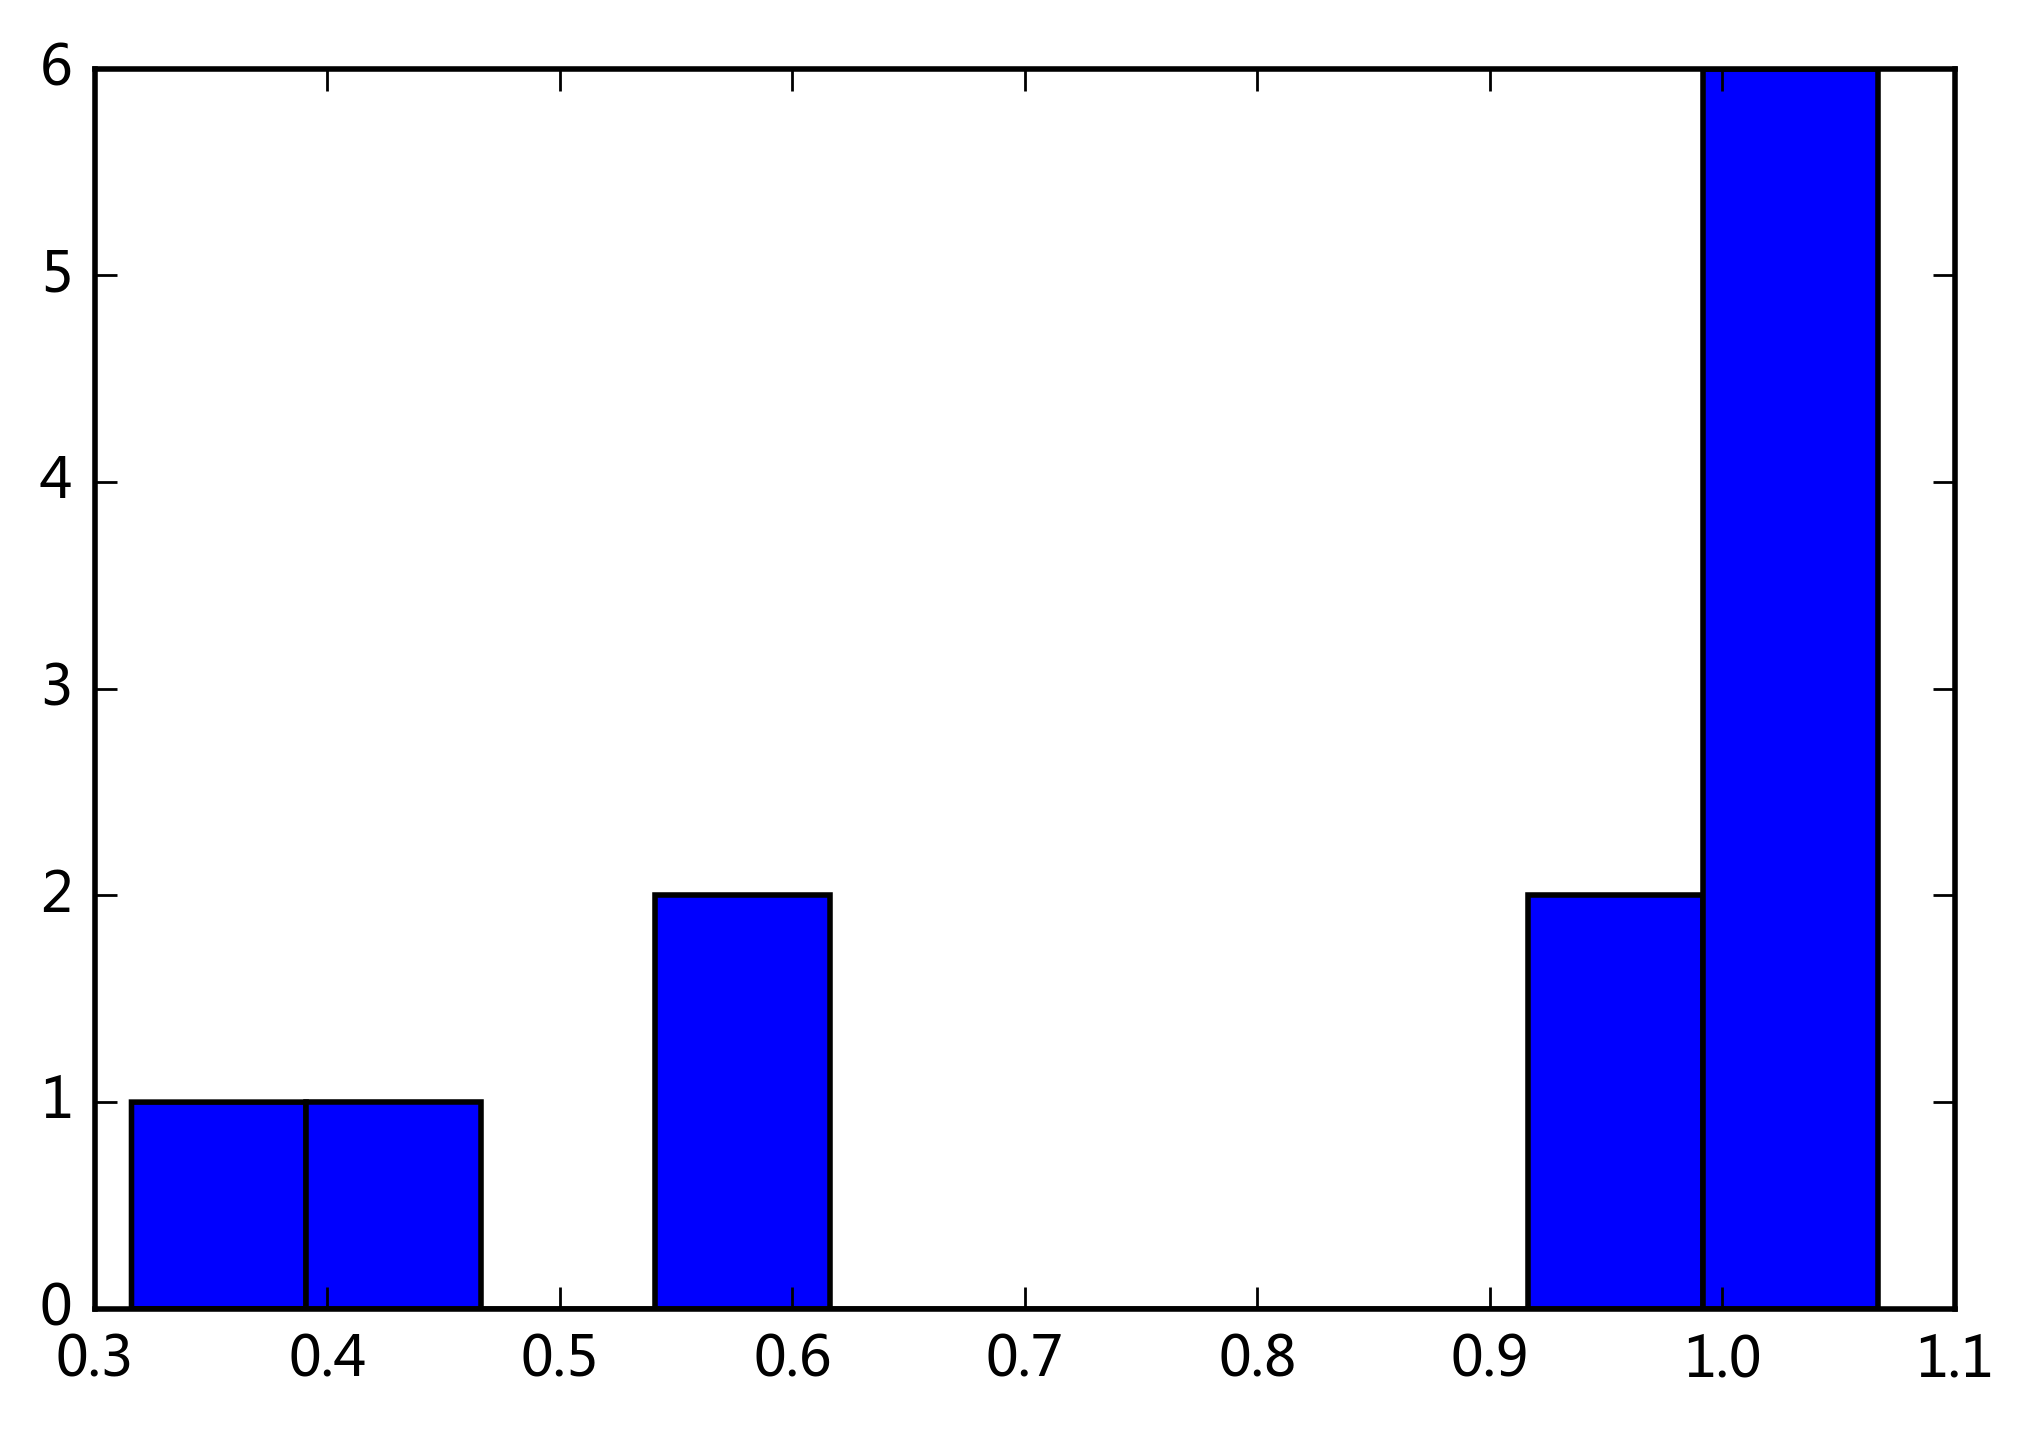

In [12]:
plt.hist([i[1] for i in tf])
plt.show()

### 5.基于 TextRank 算法的关键词抽取

In [13]:
for i in range(0,len(reports)):
    txt = reports[i]
    tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
    print u"、".join([i[0] for i in tr[:50]])

炸死、弯弯、飞弹、表示、台湾、导弹
认识、吴京
看看、队员、经历、演唱会
还原、作品、主打
爆爆、四子
转载、音乐、大势、独家、回归
大家、喜欢
合约、男团、代替、乐园
鼻子、男人
先救、表示、进水

道歉、要求、粉丝、普京
成员、单人
看到、回复

集体、拍电影
演唱会、主办方、退票、拼盘、公告、上海
要求、演唱会、首歌、粉丝、退钱、转载、上海
诈骗、拼盘、主办方、粉丝、上海

节目、迷上、大学、尾巴
玩偶、逆天、粉看
还有、没有、可能、黄子、回归

好吃、颜值、崛起、世勋、不止
小样、偶像、乳酸盐、致敬、燃少
致敬、偶像、星海、燃少
看看、大家
相应、成员、团体、偶像、狼性、大势、排行
残粉、威力、见识、卧槽
情仇、现实、四子、小说



韩国、理想、女友
成员、高速路、粉丝、追车、骗子

演唱会、广州
巡演、演唱会、天团、相关、参加


电影、出演、中国、转载
抛开、忍不住、棒子、偏见、实在

喜欢、可惜
粉丝、上演、粉丝团、百度
聊聊、挑战

黑料、八料
网友、回国、鲜肉、确定
炸死、弯弯、飞弹、表示、台湾、导弹
认识、吴京
看看、队员、经历、演唱会
还原、作品、主打
爆爆、四子
转载、音乐、大势、独家、回归
大家、喜欢
合约、男团、代替、乐园
鼻子、男人
先救、表示、进水

道歉、要求、粉丝、普京
成员、单人
看到、回复

集体、拍电影
演唱会、主办方、退票、拼盘、公告、上海
要求、演唱会、首歌、粉丝、退钱、转载、上海
诈骗、拼盘、主办方、粉丝、上海

节目、迷上、大学、尾巴
玩偶、逆天、粉看
还有、没有、可能、黄子、回归

好吃、颜值、崛起、世勋、不止
小样、偶像、乳酸盐、致敬、燃少
致敬、偶像、星海、燃少
看看、大家
相应、成员、团体、偶像、狼性、大势、排行
残粉、威力、见识、卧槽
情仇、现实、四子、小说



韩国、理想、女友
成员、高速路、粉丝、追车、骗子

演唱会、广州
巡演、演唱会、天团、相关、参加


电影、出演、中国、转载
抛开、忍不住、棒子、偏见、实在

喜欢、可惜
粉丝、上演、粉丝团、百度
聊聊、挑战

黑料、八料
网友、回国、鲜肉、确定
炸死、弯弯、飞弹、表示、台湾、导弹
认识、吴京
看看、队员、经历、演唱会
还原、作品、主打
爆爆、四子
转载、音乐、大势、独家、回归
大家、喜欢
合约、男团、代替、乐园
鼻子、男人
先救、表示、进水


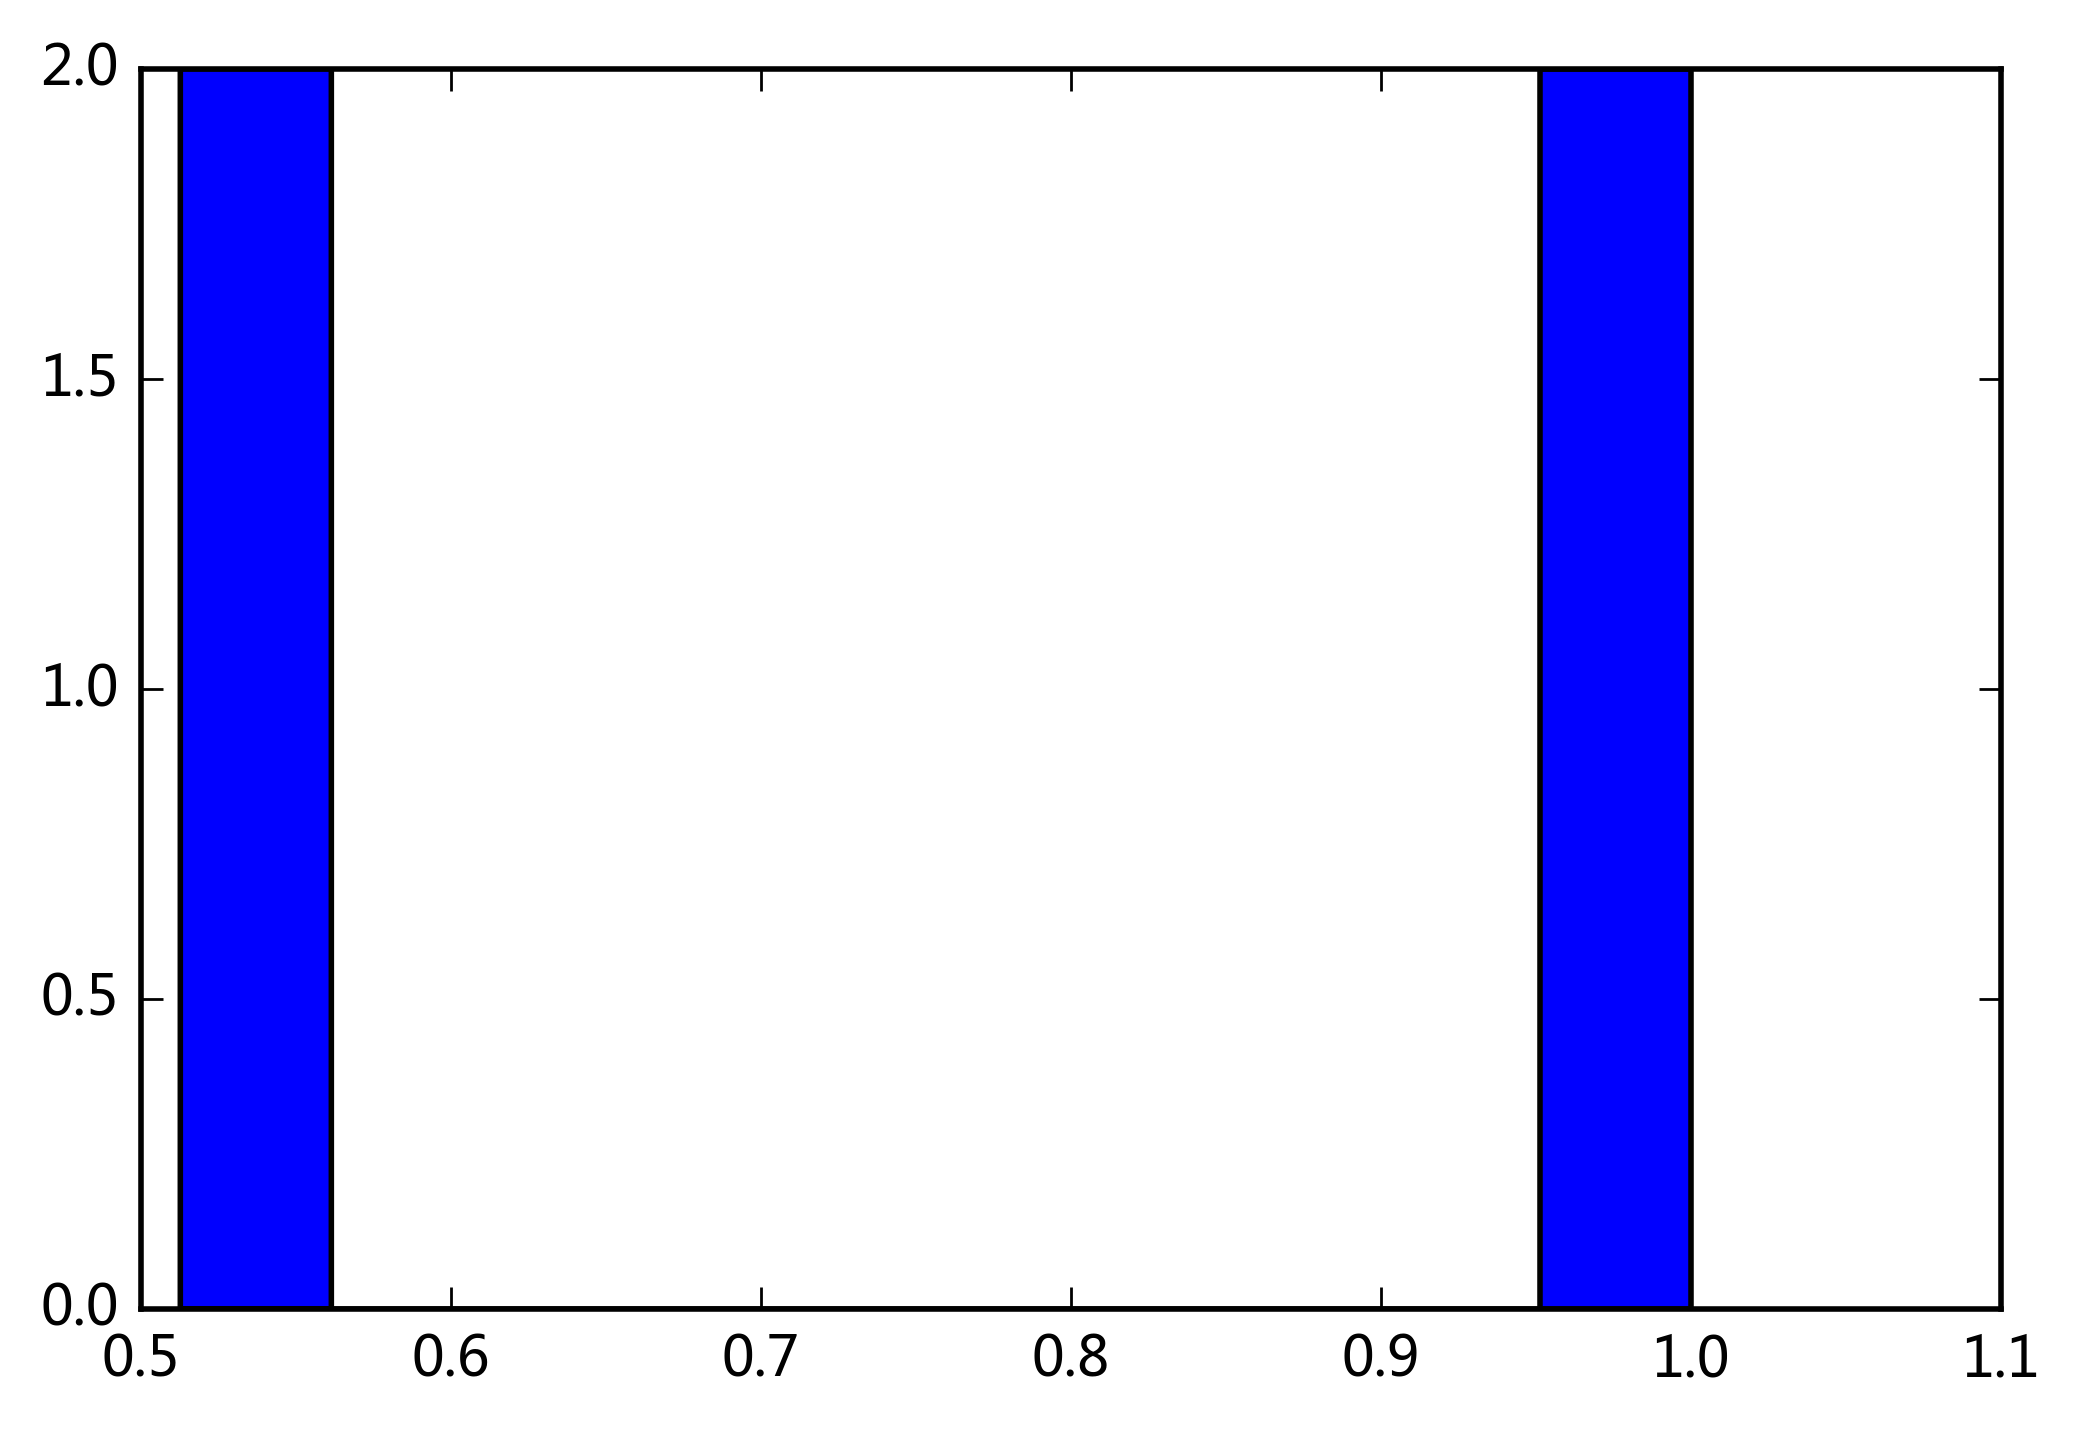

In [14]:
plt.hist([i[1] for i in tr])
plt.show()

In [15]:
import pandas as pd

def keywords(index):
    txt = reports[-index]
    tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
    tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
    tfdata = pd.DataFrame(tf, columns=['word', 'tfidf'])
    trdata = pd.DataFrame(tr, columns=['word', 'textrank'])
    worddata = pd.merge(tfdata, trdata, on='word')
    plt.plot(worddata.tfidf, worddata.textrank, linestyle='',marker='.')
    for i in range(len(worddata.word)):
        plt.text(worddata.tfidf[i], worddata.textrank[i], worddata.word[i], 
                 fontsize = worddata.textrank[i]*15, color = 'red', rotation = 0)
    plt.title('exo')
    plt.xlabel('Tf-Idf')
    plt.ylabel('TextRank')
    plt.show()

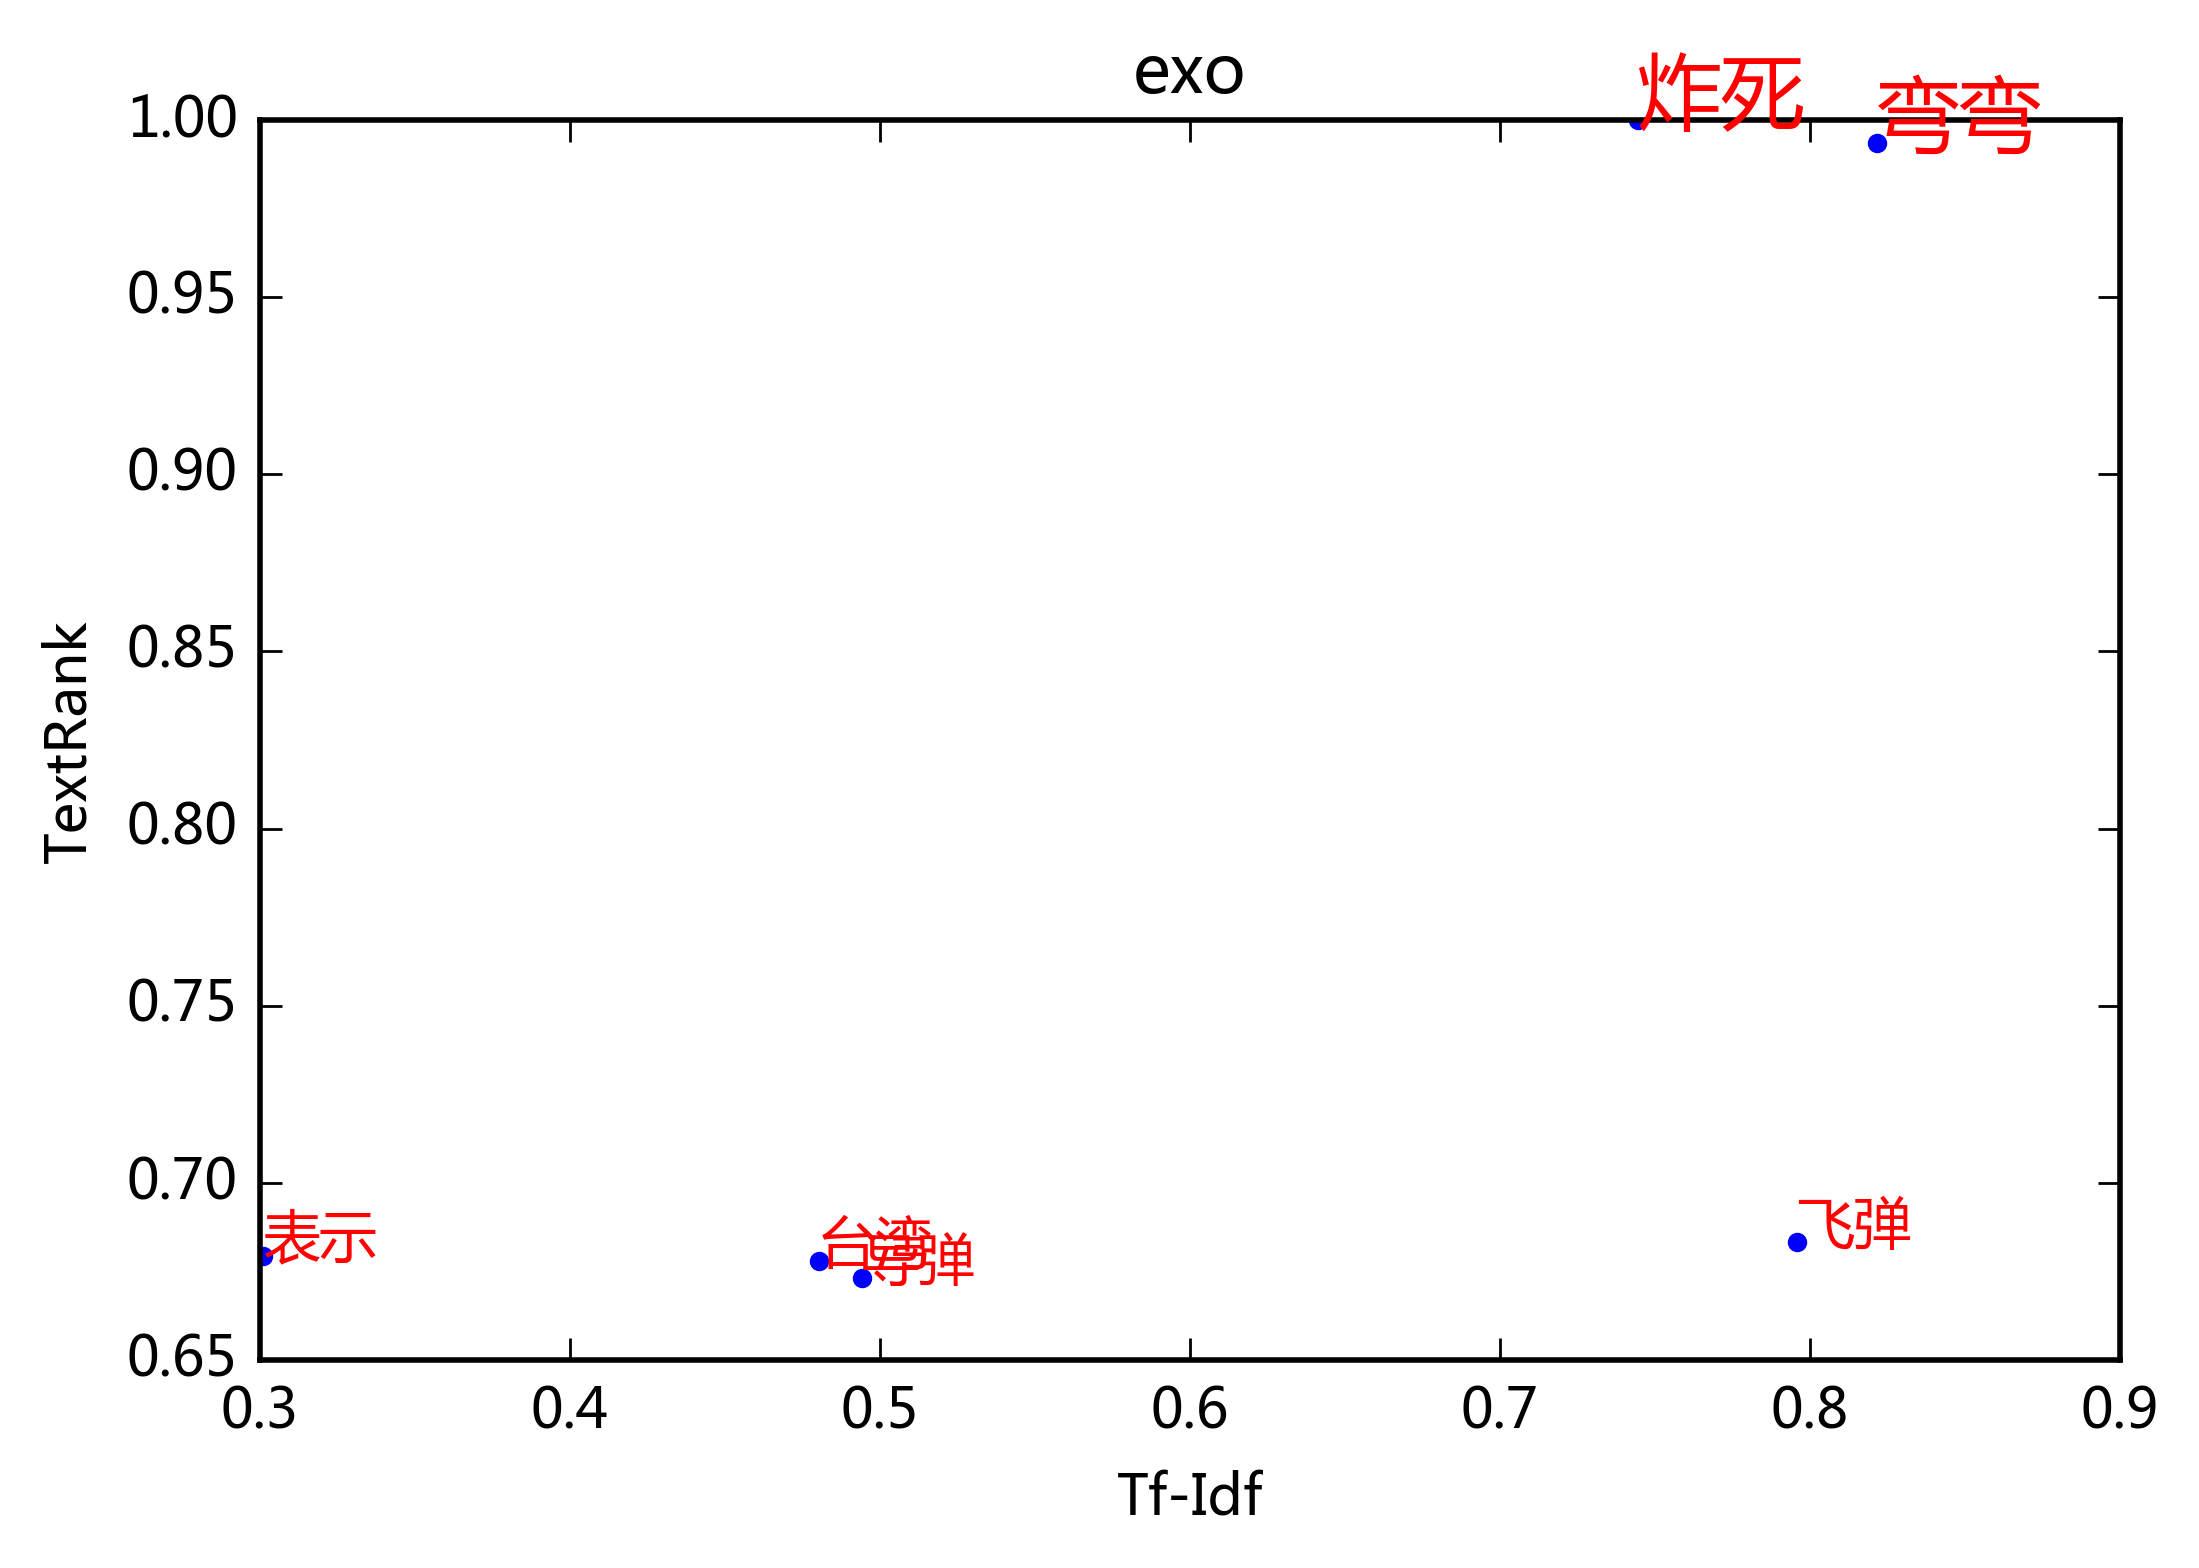

In [16]:
keywords(0)

### 分析：通过使用TF-IDF与Text Rank对于文本词频的分析后，我们选用第一组词语（炸死、弯弯、飞弹、表示、台湾、导弹）来比较两个算法分别对这些词语词频的统计。从上图可以发现，在tf-idf算法中，“炸死”、“弯弯”、“飞弹”、“表示”、“台湾”、“导弹”的权重分别是0.75、0.82、0.8、0.3、0.48、0.49左右；而在Text Rank算法中，其权重分别为1.00、0.99、0.68、0.67、0.67、0.67左右。不难发现，使用Text Rank得出的权重普遍高于TF-IDF算法，并且高出的值十分明显。

### 6.基于TF-IDF算法绘制词云

In [17]:
def wordcloudplot(txt, year):
    wordcloud = WordCloud(font_path='/Users/apricot/msyh.ttc').generate(txt)
    # Open a plot of the generated image.
    plt.imshow(wordcloud)
    plt.title(year)
    plt.axis("off")
    plt.show()

三小、...、鹿晗、EXO、吴亦凡、撞衫、黄子、鲜肉、回国、网友、确定、不是



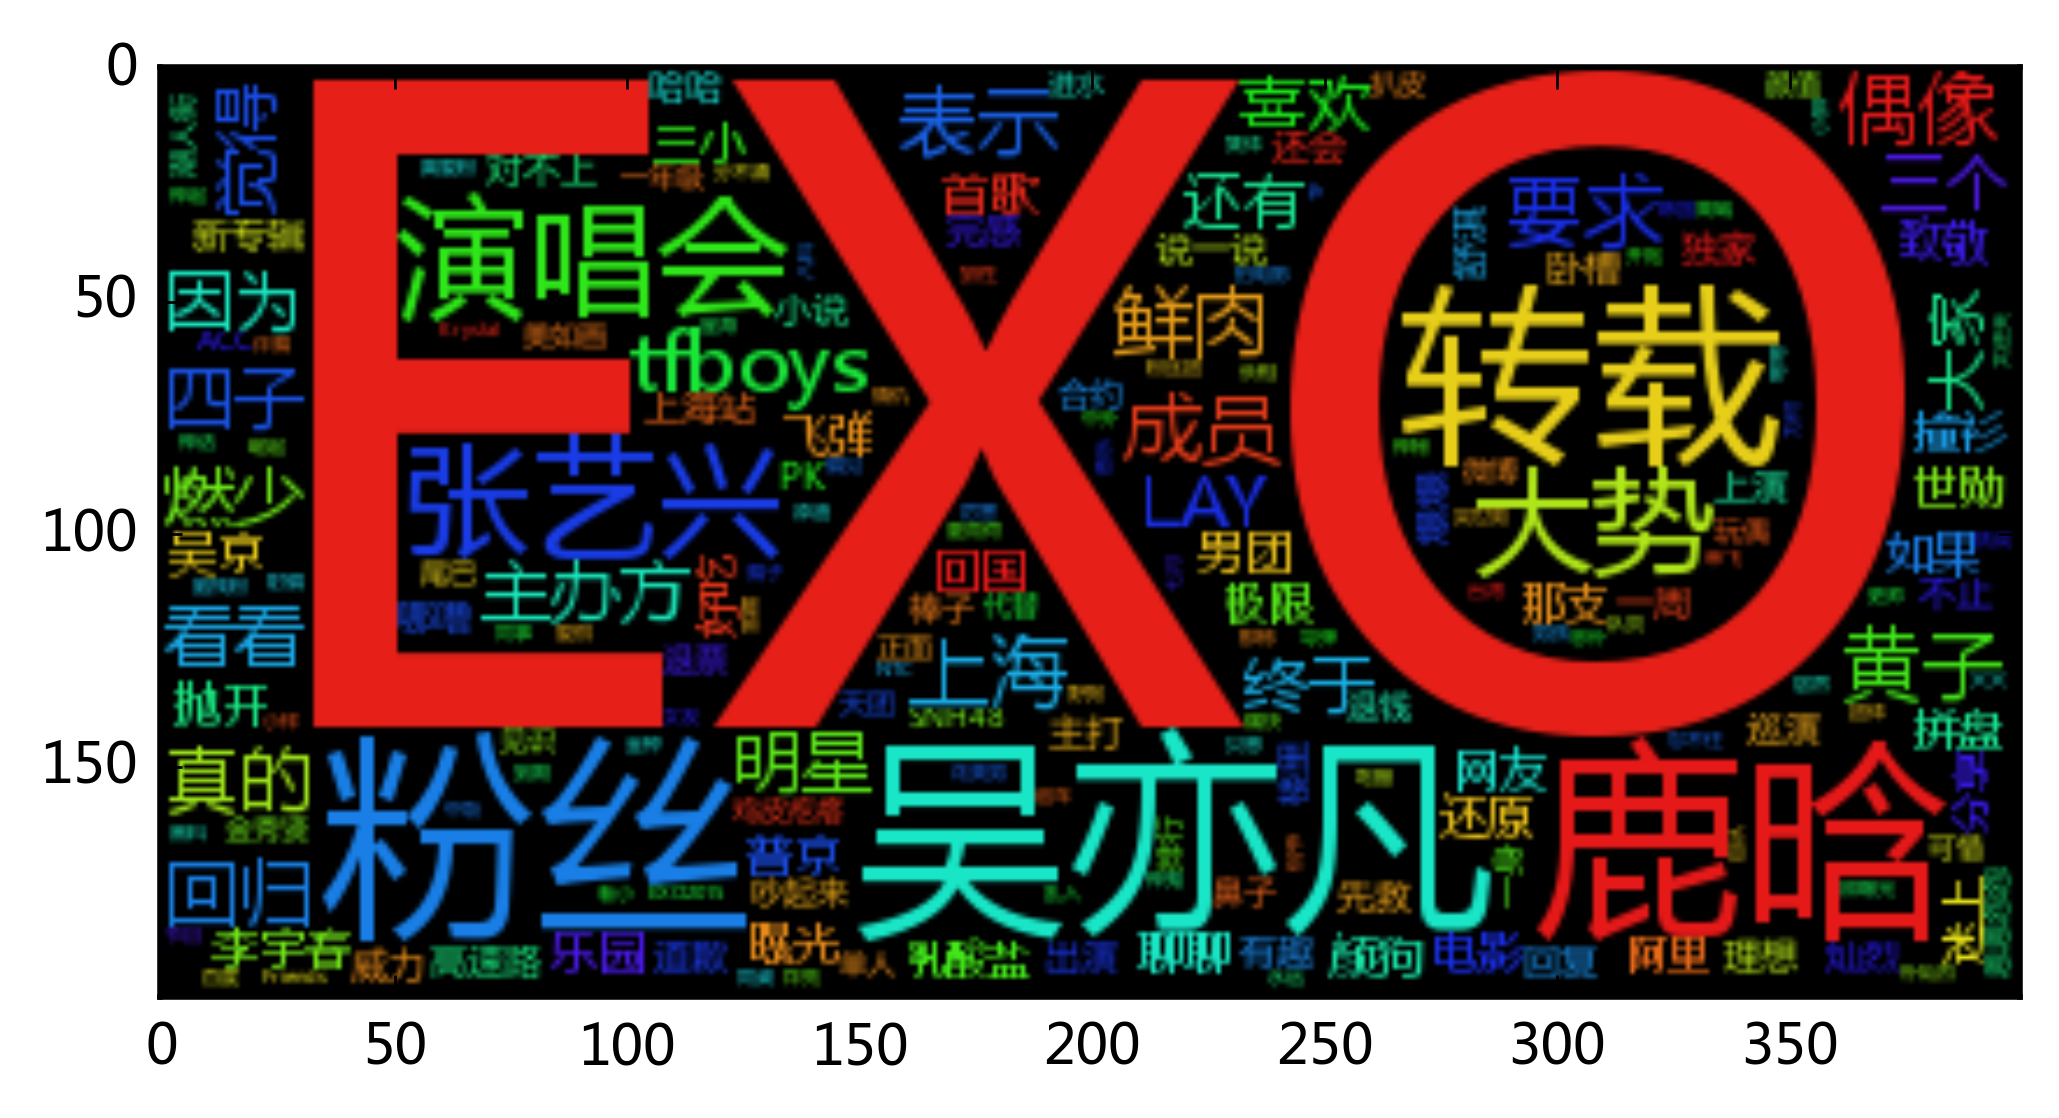

In [18]:
import jieba.analyse
with open('/Users/apricot/test.txt', 'r') as f:
    reports = f.readlines()
for i in range(0,len(reports)):
    txt += reports[i]
print u"、".join([i[0] for i in tf[:50]])
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
try:
    wordcloudplot(txt200, txt[:])
except:
    print ''

### 分析：在基于TF-IDF算法绘制出的词云图中可以明显发现，“EXO”、“吴亦凡”、“鹿晗”、“粉丝”、“转载”、“张艺兴”、“大势”等词为热门词汇；除此之外，别列入的明星名单还有吴京、李宇春、普京、SNH48等。